In [37]:
# If pandas not installed then launch this command
# !pip install pandas

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [39]:
titanic_data = pd.read_csv("titanic.csv")

### Get some information on titanic data set
- Check with method head(), info(), hist()
- Get the shape

In [40]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<AxesSubplot: title={'center': 'PassengerId'}>,
        <AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

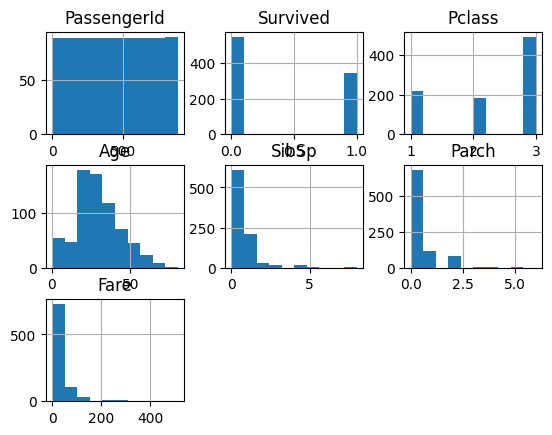

In [42]:
titanic_data.hist()

### Signification des features
- PassengerId: Unique ID of a passenger
- Survived: Whether a passenger survived or not, 1 if survived and 0 if not
- Pclass: Passenger’s class
- Name: Passenger’s name
- Sex: Passenger’s sex
- Age: Passenger’s age
- SibSp: Number of sister/brother/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation

#### Drop useless collumns
Drop the following collumns: `PassengerID, Name, Ticket, Cabin`. You can use the `drop()` method to do this. If needed get info on the web about its functioning.

In [43]:
# drop the useless collumns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### Prepare now the data: transform the Sex collumn into a numerical value
- You can use the `pd.factorize()` method. Get info on the web about its functioning.

In [44]:
# to complete : prepare data : transform the Sex collumn into a numerical value
titanic_data.Sex, _ = pd.factorize(titanic_data.Sex)

In [45]:
# verify that your operation was functioning
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


#### Prepare now the data: replace the missing age value

- First think about this question: with which value are you going to replace it?
- Then detect the NaN values and replace them with the replacement value.

In [46]:
# prepare data : replace the missing Age values. 
average_age = titanic_data.Age.mean()
print(average_age)
titanic_data.Age = titanic_data.Age.fillna(average_age)

29.69911764705882


In [47]:
# verify that your operation was functioning
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


array([[<AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>,
        <AxesSubplot: title={'center': 'Sex'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

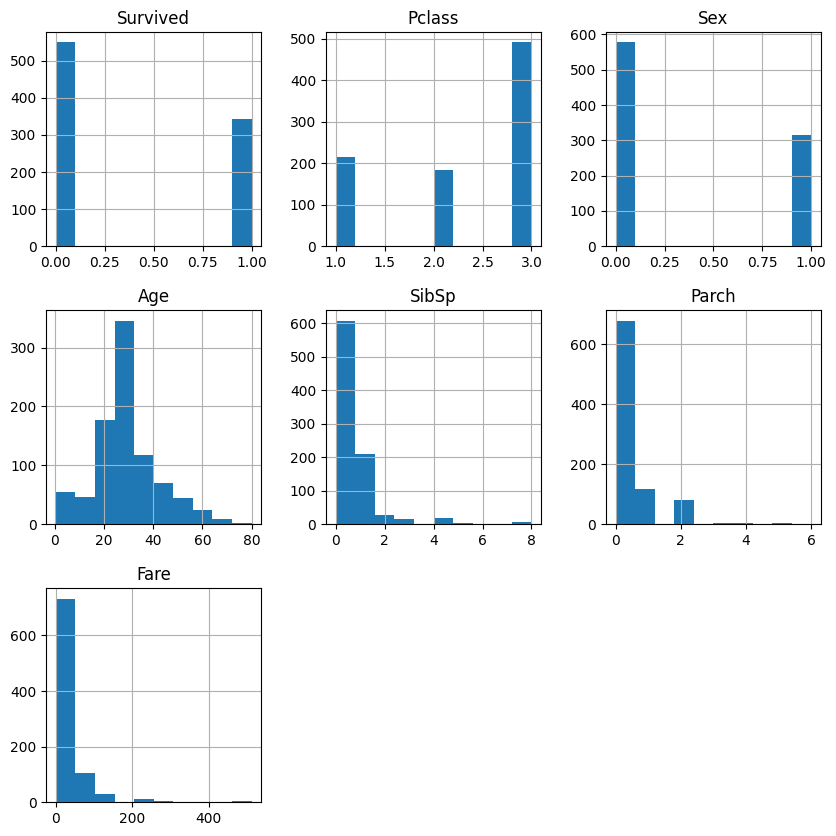

In [48]:
# plot histograms and make sure what you see is making sense
titanic_data.hist(figsize=(10, 10))

### What is the probability of dying if we are a man on the Titanic?

- First reformulate the Bayes rule in this case and enumerate the terms you need to compute. Assume that here $x$ is the gender, either 0 (male) or 1 (female).
  - Reformulation
    -  Probability of being alive or dead in function of your sex.
  - Term to compute
    - % alive on whole dataset
    - % dead on whole dataset
    - % male on whole dataset
    - % female on whole dataset
    - % male given alive: % male on sub dataset alive
    - % male given dead: % male on sub dataset dead
    - % female given alive: % female on sub dataset alive
    - % female given dead: % female on sub dataset dead
- Second complete the cells below

In [49]:
# complete this code to compute the probability of being alive or dead
y = titanic_data['Survived']
p_alive = np.count_nonzero(y != 0) / len(y)  # prior
p_dead = np.count_nonzero(y == 0) / len(y)  # prior
print('P(C_alive) = {:.2f} %'.format(p_alive * 100))
print('P(C_dead) = {:.2f} %'.format(p_dead * 100))

P(C_alive) = 38.38 %
P(C_dead) = 61.62 %


In [50]:
# complete this code to compute the  probabilities of being a male or a female
y = titanic_data['Sex']
p_male = np.count_nonzero(y == 0) / len(y)
p_female = np.count_nonzero(y == 1) / len(y)
print('P(C_male) = {:.2f} %'.format(p_male * 100))
print('P(C_female) = {:.2f} %'.format(p_female * 100))

P(C_male) = 64.76 %
P(C_female) = 35.24 %


In [51]:
# Now extract sub-data frame object with alive and dead row entries
alive = titanic_data.loc[titanic_data['Survived'] == 1]
dead = titanic_data.loc[titanic_data['Survived'] != 1]

In [52]:
# complete this code to compute the likelihoods
y = alive['Sex']
z = dead['Sex']
p_male_given_alive = np.count_nonzero(y == 0) / len(y)
p_female_given_alive = np.count_nonzero(y == 1) / len(y)
p_male_given_dead = np.count_nonzero(z == 0) / len(z)
p_female_given_dead = np.count_nonzero(z == 1) / len(z)
print('p(male|alive) = {:.2f} %'.format(p_male_given_alive * 100))
print('p(female|alive) = {:.2f} %'.format(p_female_given_alive * 100))
print('p(male|dead) = {:.2f} %'.format(p_male_given_dead * 100))
print('p(female|dead) = {:.2f} %'.format(p_female_given_dead * 100))

p(male|alive) = 31.87 %
p(female|alive) = 68.13 %
p(male|dead) = 85.25 %
p(female|dead) = 14.75 %


Now, what is the probability of dying if we are a man on the Titanic?

In [53]:
# complete this code to compute the posterior probabilities
p_dead_given_male = p_male_given_dead * p_dead / p_male
p_alive_given_male = p_male_given_alive * p_alive / p_male
p_dead_given_female = p_female_given_dead * p_dead / p_female
p_alive_given_female = p_female_given_alive * p_alive / p_female
print('P(dead|male) = {:.2f} %'.format(p_dead_given_male * 100))
print('P(alive|male) = {:.2f} %'.format(p_alive_given_male * 100))
print('P(dead|female) = {:.2f} %'.format(p_dead_given_female * 100))
print('P(alive|female) = {:.2f} %'.format(p_alive_given_female * 100))

P(dead|male) = 81.11 %
P(alive|male) = 18.89 %
P(dead|female) = 25.80 %
P(alive|female) = 74.20 %


#### Knowing the posterior probabilities, what decision would take a classifier taking as input only the Sex attribute?

Si c'est un homme il va dire qu'il va mourir tandis que si c'est une femme il va dire qu'elle va survivre.

### Optional: build a Bayesian classifier on 1 numerical value
Using the **age** as features. Let's build a model for $P(C_0|x)$ with $x$ being the age.

In [54]:
def computeLikelihood(x, mean, std):
    return 1 / ((2 * np.pi * std ** 2) ** 0.5) * np.exp(- (1 / (2 * std ** 2) * ((x - mean) ** 2)))

In [55]:
mean_age_given_alive = alive['Age'].mean()
std_age_given_alive = alive['Age'].std()
mean_age_given_dead = dead['Age'].mean()
std_age_given_dead = dead['Age'].std()

In [56]:
y_test = titanic_test['Survived']
y_pred = ...  # complete the code here (you may use for loops if you want 
# but we would recommend to use "comprehension lists")

NameError: name 'titanic_test' is not defined

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f} %'.format(accuracy * 100))